In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#DATABASE CONNECTION

In [2]:
conn = sqlite3.connect("expense_tracker.db")
cursor = conn.cursor()

print('Database Created Successfully')

Database Created Successfully


In [30]:
conn = sqlite3.connect("expense_tracker.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS expenses (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    date TEXT,
    category TEXT,
    amount REAL,
    expense_type TEXT,
    forgiven INTEGER
)
""")

conn.commit()
conn.close()

print("Database and table ready")


Database and table ready


In [45]:
def add_expense():
    date = input("Enter date (YYYY-MM-DD): ")
    category = input("Enter category (Food/Travel/Rent/etc): ")
    amount = float(input("Enter amount: "))
    expense_type = input("Expense type (Essential/Optional/Regret): ")
    forgiven = int(input("Forgiven? (1 = Yes, 0 = No): "))

    return date, category, amount, expense_type, forgiven


In [46]:
def insert_expense(data):
    conn = sqlite3.connect("expense_tracker.db")
    cursor = conn.cursor()

    cursor.execute("""
    INSERT INTO expenses (date, category, amount, expense_type, forgiven)
    VALUES (?, ?, ?, ?, ?)
    """, data)

    conn.commit()
    conn.close()

    print("Expense added successfully")


In [47]:
expense_data = add_expense()
insert_expense(expense_data)


Enter date (YYYY-MM-DD): 2022-05-07
Enter category (Food/Travel/Rent/etc): etc
Enter amount: 809
Expense type (Essential/Optional/Regret): Regret
Forgiven? (1 = Yes, 0 = No): 0
Expense added successfully


In [48]:
conn = sqlite3.connect("expense_tracker.db")
df = pd.read_sql_query("SELECT * FROM expenses", conn)
conn.close()

df


,id,date,category,amount,expense_type,forgiven
0,1,2026-02-06,Food,250.0,Essential,0
1,2,2026-02-06,Travel,167.0,Optional,1
2,3,2026-02-06,Travel,167.0,Optional,1
3,4,2022-05-07,etc,809.0,Regret,0


In [49]:
total_expense = np.sum(df['amount'])
average_expense = np.mean(df['amount'])

print("Total:", total_expense)
print("Average:", average_expense)


Total: 1393.0
Average: 348.25


In [50]:
df.to_csv("expenses.csv", index=False)
print("CSV updated")


CSV updated


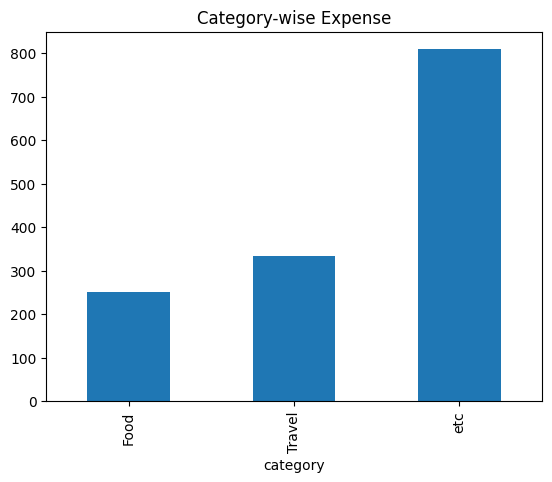

In [51]:
category_summary = df.groupby('category')['amount'].sum()

category_summary.plot(kind='bar')
plt.title("Category-wise Expense")
plt.show()


In [52]:
%%writefile requirements.txt
pandas
numpy
matplotlib


Overwriting requirements.txt


In [53]:
total_expense = np.sum(df['amount'])
average_expense = np.mean(df['amount'])
max_expense = np.max(df['amount'])

print("Total Expense:", total_expense)
print("Average Expense:", average_expense)
print("Highest Expense:", max_expense)


Total Expense: 1393.0
Average Expense: 348.25
Highest Expense: 809.0


In [54]:
category_summary = df.groupby('category')['amount'].sum()
category_summary


,amount
category,
Food,250.0
Travel,334.0
etc,809.0


In [55]:
df.to_csv("expenses.csv", index=False)
print("expenses.csv created successfully")


expenses.csv created successfully


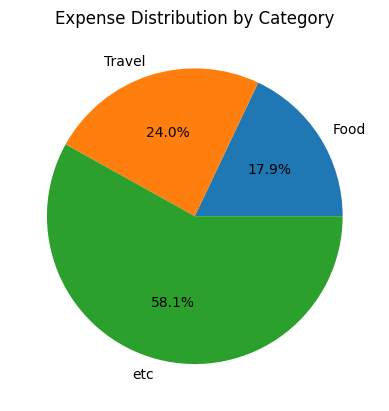

In [57]:
plt.figure()
category_summary.plot(kind='pie', autopct='%1.1f%%')
plt.title("Expense Distribution by Category")
plt.ylabel("")
plt.show()


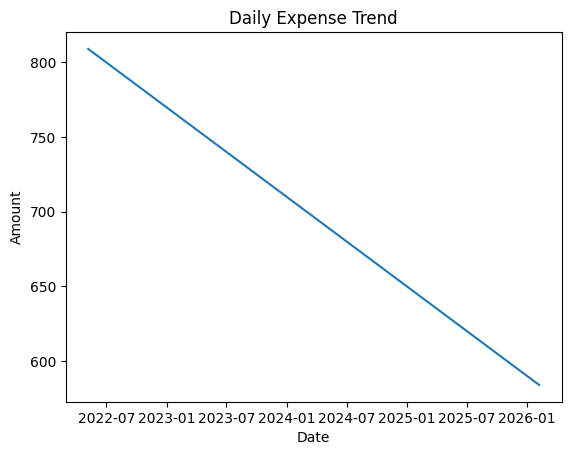

In [58]:
df['date'] = pd.to_datetime(df['date'])
daily_expense = df.groupby('date')['amount'].sum()

plt.figure()
plt.plot(daily_expense)
plt.title("Daily Expense Trend")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.show()


In [59]:
top_category = category_summary.idxmax()
top_amount = category_summary.max()

print("Top spending category:", top_category)
print("Amount spent:", top_amount)

if top_amount > average_expense:
    print("Insight: Major spending is concentrated in one category.")
else:
    print("Insight: Spending is well balanced across categories.")


Top spending category: etc
Amount spent: 809.0
Insight: Major spending is concentrated in one category.


In [60]:
regret_expense = df[df['expense_type'] == 'Regret']['amount'].sum()
regret_percent = (regret_expense / total_expense) * 100

print("Regret Expense Percentage:", round(regret_percent, 2), "%")

if regret_percent > 20:
    print("Warning: High regret spending detected.")
else:
    print("Good job: Regret spending under control.")


Regret Expense Percentage: 58.08 %
